# So in lieu of generating a 'locked' p-value, let's just plot the p-values that we've already got from the motif outputs
- just look for the pvalues from each image and hardcode/manually generate a bargraph

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict, OrderedDict
from tqdm import tnrange, tqdm_notebook

In [9]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/motifs'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/motifs'
rand_pvalues = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/outputs/p-values.tsv'

# Motif files that we're pulling from:
```bash
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-6_barcodes_noCS.rand500.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-6_barcodes_noCS.rand300.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-6_barcodes_noCS.rand200.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-6_barcodes_noCS.rand100.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-6_barcodes_noCS.rand50.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-6_barcodes_noCS.rand10.txt.fx.annotated.windows_51.e0.001_conf0.99.svg

RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-7_barcodes_noCS.rand500.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-7_barcodes_noCS.rand300.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-7_barcodes_noCS.rand200.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-7_barcodes_noCS.rand100.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-7_barcodes_noCS.rand50.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-7_barcodes_noCS.rand10.txt.fx.annotated.windows_51.e0.001_conf0.99.svg
```

In [3]:
dfr = pd.DataFrame(index=['-log10(p)'], columns=[10, 50, 100, 200, 300, 500]).T
dft = pd.DataFrame(index=['-log10(p)'], columns=[10, 50, 100, 200, 300, 500]).T

In [4]:
dfr.loc[10]['-log10(p)'] = 0
dfr.loc[50]['-log10(p)'] = 14
dfr.loc[100]['-log10(p)'] = 18
dfr.loc[200]['-log10(p)'] = 27
dfr.loc[300]['-log10(p)'] = 27
dfr.loc[500]['-log10(p)'] = 45
dfr.loc[:,'RBP'] = 'RBFOX2'
dfr.loc[:,'Color'] = 'blue'

dft.loc[10]['-log10(p)'] = 0
dft.loc[50]['-log10(p)'] = 0
dft.loc[100]['-log10(p)'] = 0
dft.loc[200]['-log10(p)'] = 23
dft.loc[300]['-log10(p)'] = 17
dft.loc[500]['-log10(p)'] = 41
dft.loc[:,'RBP'] = 'TIA1'
dft.loc[:,'Color'] = 'red'

df = pd.concat([dft, dfr])
df

,-log10(p),RBP,Color
10,0,TIA1,red
50,0,TIA1,red
100,0,TIA1,red
200,23,TIA1,red
300,17,TIA1,red
500,41,TIA1,red
10,0,RBFOX2,blue
50,14,RBFOX2,blue
100,18,RBFOX2,blue
200,27,RBFOX2,blue


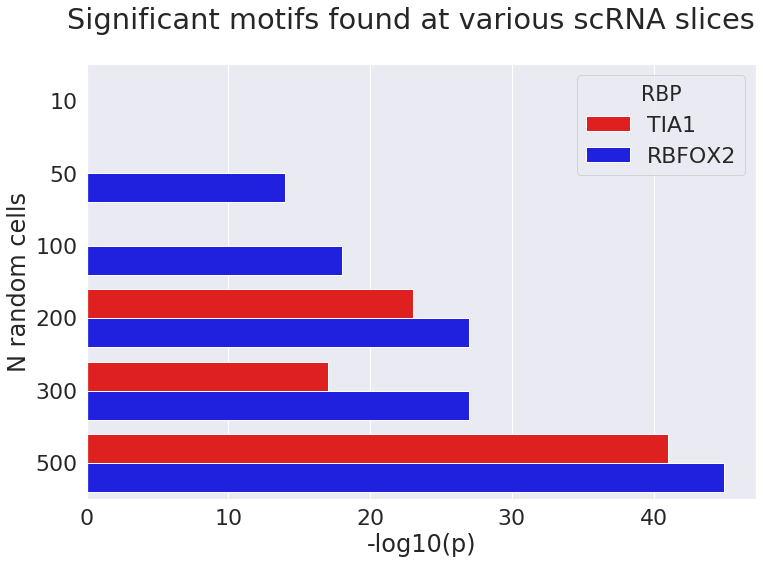

In [5]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='-log10(p)', y=df.index, data=df, hue='RBP', orient='h', palette=['red','blue'], ax=ax)
ax.set_ylabel("N random cells")
fig.suptitle("Significant motifs found at various scRNA slices")
fig.savefig(os.path.join(output_dir, 'motif_barh.svg'))

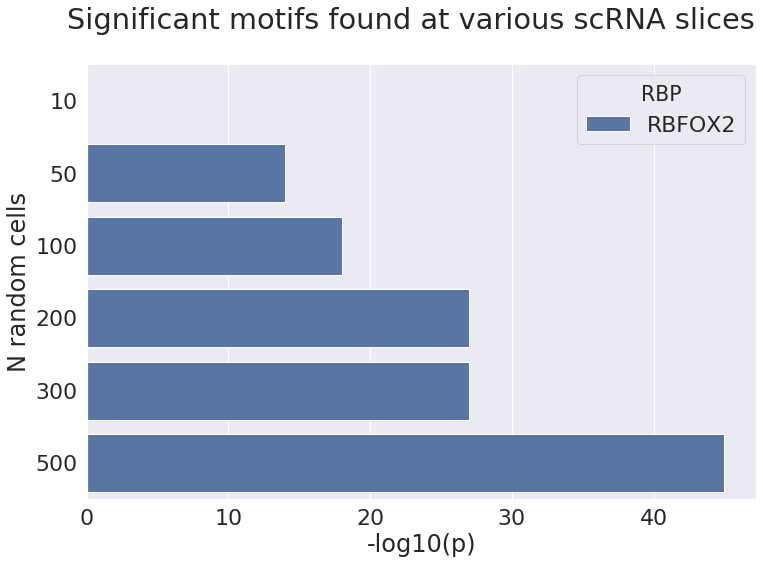

In [6]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='-log10(p)', y=dfr.index, data=dfr, ax=ax, hue='RBP', orient='h')
ax.set_ylabel("N random cells")
fig.suptitle("Significant motifs found at various scRNA slices")
fig.savefig(os.path.join(output_dir, 'motif_barh_RBFOX2.svg'))

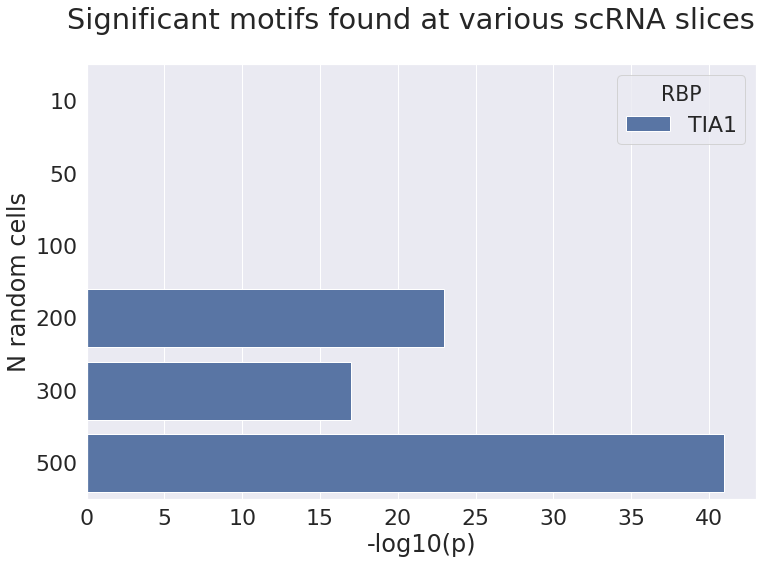

In [7]:
sns.set(font_scale=2)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='-log10(p)', y=dft.index, data=dft, ax=ax, hue='RBP', orient='h')
ax.set_ylabel("N random cells")
fig.suptitle("Significant motifs found at various scRNA slices")
fig.savefig(os.path.join(output_dir, 'motif_barh_TIA1.svg'))

In [8]:
# Downsample and randomly select

In [15]:
df = pd.read_csv(rand_pvalues, sep='\t', index_col=0)
df.loc['RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-34_barcodes.rand1.trial-9.txt.fx.annotated.windows_51.e0.001_conf0.99']

Motif Name                              1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...
Consensus                                                                          TGCATG
P-value                                                                                 1
Log P-value                                                                        -1.484
q-value (Benjamini)                                                                0.2268
# of Target Sequences with Motif                                                        3
% of Target Sequences with Motif                                                   11.11%
# of Background Sequences with Motif                                                  3.4
% of Background Sequences with Motif                                                5.09%
Name: RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-34_barcodes.rand1.trial-9.txt.fx.annotated.windows_51.e0.001_conf0.99, dtype: object